In [ ]:
import matplotlib.pyplot as plt
import numpy as np


#not in scope of this course
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch.utils.data import DataLoader

In [ ]:
train_dataset = MNIST("/", download = True, train = True, transform = T.ToTensor())
test_dataset = MNIST("/", download = True, train = False, transform = T.ToTensor())

In [ ]:
bs = 32

train_loader = DataLoader(train_dataset, batch_size = bs)
test_loader = DataLoader(test_dataset, batch_size = bs)

#Tasks
#1) Train a logistic regression model using numpy (PyTorch or any other framework is not allowed)
#2) Implement the softmax layer
#3) Implement the cross entropy loss
#4) plot the training loss
#5) Show the test Accuracy
#6) Show a few incorrectly labelled samples

In [ ]:
batch = next(iter(train_loader))

In [ ]:
print(batch[0].shape)

torch.Size([32, 1, 28, 28])


In [ ]:
print(batch[1].shape)

torch.Size([32])


In [ ]:
def CE(yhat, y):
  return -np.sum(y * np.log(yhat + 1e-8))

In [ ]:
def softmax(z):
  max_z = np.max(z)
  exp_z = np.exp(z - max_z)  # Subtract max_z to prevent overflow
  return exp_z / np.sum(exp_z)

In [ ]:
ni = batch[0].shape[1] * batch[0].shape[2] * batch[0].shape[3] # input channels * rows * columns
no = 10 # number of classes, which we know

w = np.random.randn(ni, no)
b = np.ones(no)

lr = 5e-5
epochs = 10

In [ ]:
print(w.shape, b.shape)

(784, 10) (10,)


Epoch: 1, loss: 565.0277962776854 No. correctly labelled images: 7856/60000, Acc: 0.13093333333333335
Epoch: 2, loss: 544.0383659501546 No. correctly labelled images: 13952/60000, Acc: 0.23253333333333334
Epoch: 3, loss: 543.7550210773402 No. correctly labelled images: 19968/60000, Acc: 0.3328
Epoch: 4, loss: 547.7302051353013 No. correctly labelled images: 25161/60000, Acc: 0.41935
Epoch: 5, loss: 551.2017404304476 No. correctly labelled images: 29672/60000, Acc: 0.4945333333333333
Epoch: 6, loss: 554.1423292057843 No. correctly labelled images: 33220/60000, Acc: 0.5536666666666666
Epoch: 7, loss: 556.546243712356 No. correctly labelled images: 35867/60000, Acc: 0.5977833333333333
Epoch: 8, loss: 558.5023105939807 No. correctly labelled images: 37799/60000, Acc: 0.6299833333333333
Epoch: 9, loss: 560.0940853692169 No. correctly labelled images: 39356/60000, Acc: 0.6559333333333334
Epoch: 10, loss: 561.4351835843111 No. correctly labelled images: 40415/60000, Acc: 0.6735833333333333


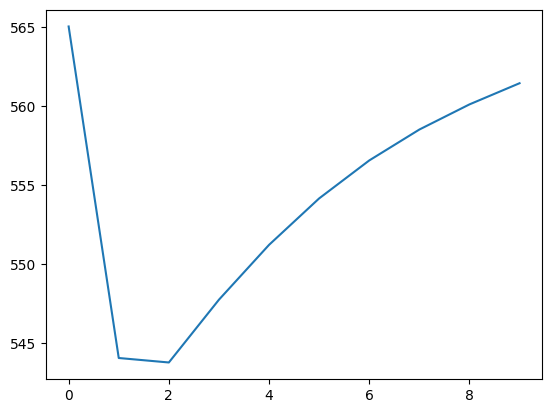

In [ ]:
ls = []
for i in range(epochs):
  correct = 0
  loss_batches = 0
  for batch in train_loader:
    X = batch[0].reshape(-1, ni)
    X = np.array(X)
    y = batch[1]
    y = np.eye(no)[y]

    # forward pass
    z = X @ w + b
    yhat = softmax(z)
    loss = CE(yhat, y)
    loss_batches += loss
    # backward pass
    dz = yhat - y
    dw = X.T @ dz
    db = np.sum(dz, axis=0)

    w -= lr * dw
    b -= lr * db

    pred = np.argmax(yhat, axis=1)
    correct += np.sum(pred == np.argmax(y, axis=1))

  ls.append(loss_batches/len(train_loader))
  print(f'Epoch: {i+1}, loss: {ls[-1]} No. correctly labelled images: {correct}/60000, Acc: {correct/60000}')
plt.plot(ls)

In [ ]:
loss_batches = 0
for batch in test_loader:
  X = batch[0].reshape(-1, ni)
  X = np.array(X)
  y = batch[1]
  y = np.eye(no)[y]

  # forward pass
  z = X @ w + b
  yhat = softmax(z)

  loss = CE(yhat, y)
  loss_batches += loss
  pred = np.argmax(yhat, axis=1)
  correct += np.sum(pred == np.argmax(y, axis=1))


print(f'No. correctly labelled test images: {correct}/60000, test Acc: {correct/60000}')

No. correctly labelled test images: 47292/60000, test Acc: 0.7882
